In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
df6 = pd.read_csv('df6.csv', 
                    parse_dates=['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation'],
                    dtype={
                        'city': 'string',
                        'province': 'string',
                        'country': 'string',
                    })

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235496 entries, 0 to 235495
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city                     235423 non-null  string        
 1   province                 235238 non-null  string        
 2   country                  235496 non-null  string        
 3   latitude                 235496 non-null  float64       
 4   longitude                235496 non-null  float64       
 5   date_onset_symptoms      235496 non-null  datetime64[ns]
 6   date_admission_hospital  235496 non-null  datetime64[ns]
 7   date_confirmation        235496 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), string(3)
memory usage: 14.4 MB


In [8]:
def build_data():
    cnt = df6[df6.country.isin(['Colombia'])].groupby(pd.Grouper(key='date_admission_hospital', freq='SM')).size()
    return pd.DataFrame({'date': cnt.index, 'total_count': cnt.values}).set_index('date')

data = build_data()

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-01-15 to 2020-12-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_count  23 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


In [10]:
min(data.index), max(data.index)

(Timestamp('2020-01-15 00:00:00'), Timestamp('2020-12-15 00:00:00'))

<AxesSubplot:ylabel='Count'>

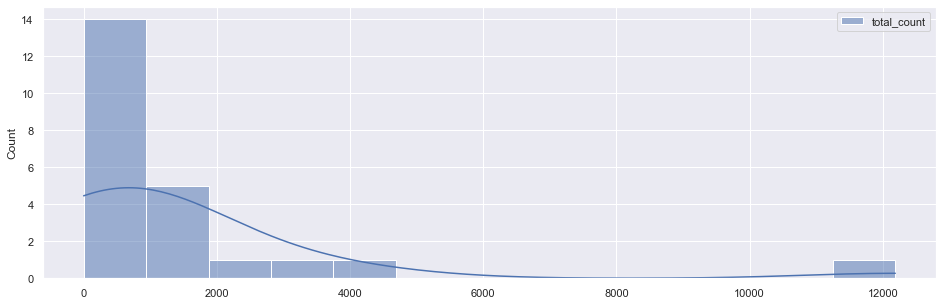

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16,5))
sns.histplot(data, kde=True, ax=ax)

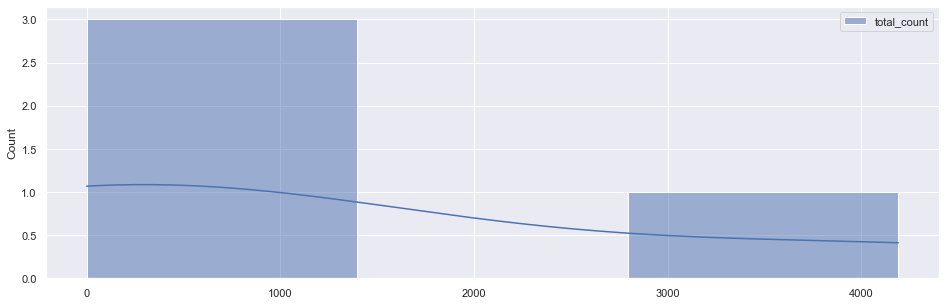

In [18]:
def hist_plot(month, year = 2020, month_gap = 1):
    start_date = '{}-{}-1'.format(year, month)
    to_date = '{}-{}-1'.format(year, month + month_gap)

    fig, ax = plt.subplots(1, 1, figsize=(16,5))
    sns.histplot(data[start_date : to_date], kde=True, ax=ax)

hist_plot(6, month_gap = 2)